In [1]:
# from malab import *
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *

from malab.dsfit import fitexp,fitgauss
import json

import numpy as np
import matplotlib.pyplot as plt

from malab import SlabFile, get_next_filename
from qualang_tools.plot import Fit


No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load InstrumentManagerWindow
2025-05-02 17:24:01,269 - qm - INFO     - Starting session: 2e794a3a-897f-4bc3-b526-3a187a266b9c


# (Import) data + cleaning

Text(0.5, 0, 'q_times (us)')

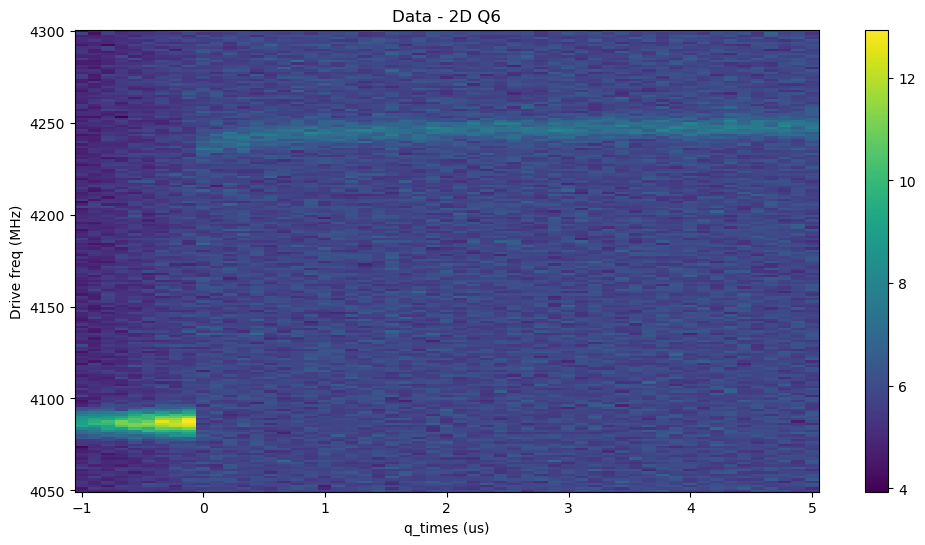

In [2]:
global_data_path = r"M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250429 - Santi - RFSoC tprocv2 - ff_distortion"
expt_path = r"\scan - 20us pulse - 0.4amplitude"
global_data_path = global_data_path + expt_path

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

q_times = np.linspace(-1, 10, 100)[:55] # in us
# q_times = np.arange(5,100,1) # in us
data_path = global_data_path + "\\"
data_files = []
q1 = 6
date1 = '2025-05-01'
date2 = '2025-04-22'
index_shift = 0
for i in range(len(q_times)):
    try:
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date1 + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files.append(temp_file)
    except:
        i-=index_shift
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date2 + '.h5'
        # print(temp_file)
        data_files.append(temp_file)

qubit_freqs = []

for i, data in enumerate(data_files):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

    qubit_freqs.append(freqs[np.argmax(amps)])

# plt.figure(figsize=(12,6))
# plt.plot(qubit7_freqs, marker='o')
# plt.xlabel('DC flux (mA)')
# plt.ylabel('Qubit Frequency (MHz)')
# plt.title('Qubit Frequency vs Flux Target')
# plt.show()

qubit0_freqs = []
freq_pts0 = []
amp_pts0 = []

for i, data in enumerate(data_files):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)
    freq_pts0.append(freqs)
    amp_pts0.append(amps)

freq_pts0 = np.array(freq_pts0)
amp_pts0 = np.array(amp_pts0)

cmap = 'viridis'
plt.figure(figsize=(12,6))
plt.pcolor(q_times, freq_pts0.T, amp_pts0.T, cmap = cmap)#, vmax = 7, vmin=5)
plt.colorbar()
plt.title('Data - 2D Q' + str(q1))
plt.ylabel('Drive freq (MHz)')
plt.xlabel('q_times (us)')

Text(0.5, 0, 'q_times (us)')

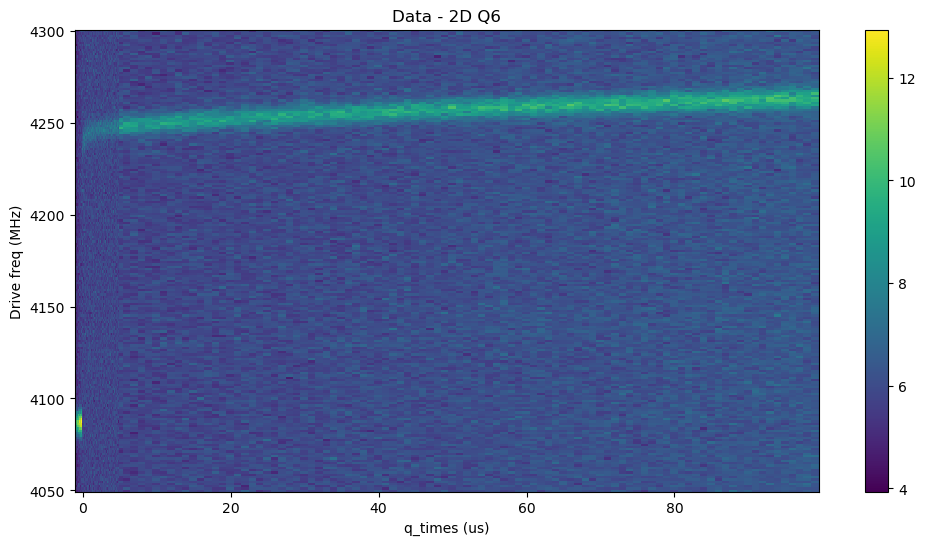

In [3]:
global_data_path = r"M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250429 - Santi - RFSoC tprocv2 - ff_distortion"
expt_path = r"\scan - long times pulse - 0.4amplitude"
global_data_path = global_data_path + expt_path

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# q_times = np.linspace(-1, 10, 100) # in us
q_times1 = np.arange(5,100,1) # in us
data_path = global_data_path + "\\"
data_files0 = []
q1 = 6
date1 = '2025-05-01'
date2 = '2025-04-22'
index_shift = 0
for i in range(len(q_times1)):
    try:
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date1 + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files0.append(temp_file)
    except:
        i-=index_shift
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date2 + '.h5'
        # print(temp_file)
        data_files0.append(temp_file)

# qubit_freqs = []
# qubit_freqs = qubit_freqs.tolist()
for i, data in enumerate(data_files0):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

    qubit_freqs.append(freqs[np.argmax(amps)])

# plt.figure(figsize=(12,6))
# plt.plot(qubit7_freqs, marker='o')
# plt.xlabel('DC flux (mA)')
# plt.ylabel('Qubit Frequency (MHz)')
# plt.title('Qubit Frequency vs Flux Target')
# plt.show()

# qubit0_freqs = []
# freq_pts0 = []
# amp_pts0 = []
# convert np array to list
# qubit0_freqs = qubit_freqs.tolist()
freq_pts0 = freq_pts0.tolist()
amp_pts0 = amp_pts0.tolist()

for i, data in enumerate(data_files0):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)
    freq_pts0.append(freqs)
    amp_pts0.append(amps)

freq_pts0 = np.array(freq_pts0)
amp_pts0 = np.array(amp_pts0)

cmap = 'viridis'
plt.figure(figsize=(12,6))
plt.pcolor(np.append(q_times, q_times1), freq_pts0.T, amp_pts0.T, cmap = cmap)#, vmax = 7, vmin=5)
plt.colorbar()
plt.title('Data - 2D Q' + str(q1))
plt.ylabel('Drive freq (MHz)')
plt.xlabel('q_times (us)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


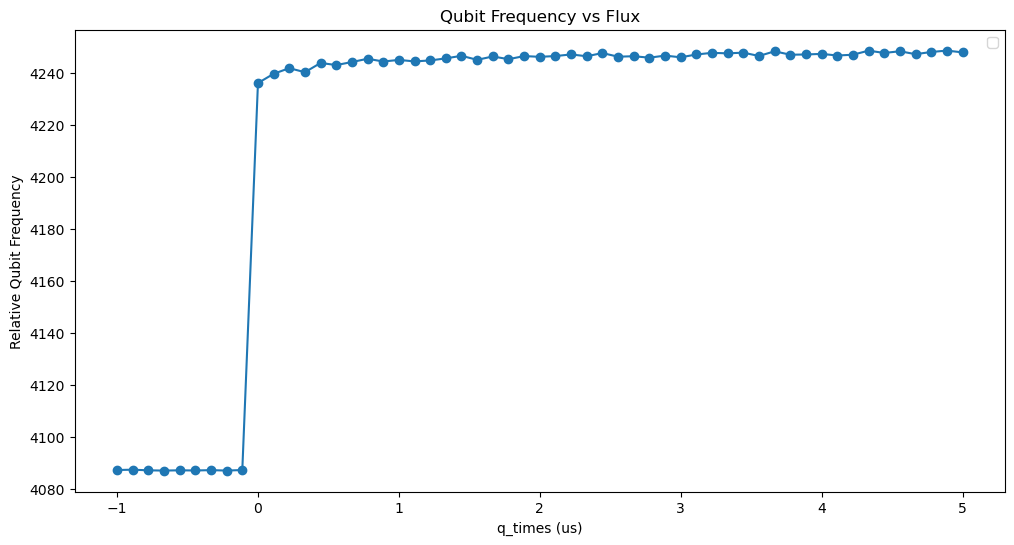

In [4]:
qubit_freqs = []
for i, data in enumerate(data_files):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)
    
    fit = Fit()
    fit_results = fit.transmission_resonator_spectroscopy(freqs, amps, plot=False)
    qubit_freqs.append(fit_results['f'][0])
    # qubit_freqs.append(freqs[np.argmin(amps)])

# for i, data in enumerate(data_files0):
#     with SlabFile(data, 'r') as f:
#         freqs = array(f['fpts'])[0]
#         I = array(f['avgi'])[0]
#         Q = array(f['avgq'])[0]
#         amps = array(f['amps'])[0]
#         # fit_result = f.attrs['fit_result']
#         # fit_result = json.loads(fit_result)
#         config = f.attrs['config']
#         config = json.loads(config)
    
#     fit = Fit()
#     fit_results = fit.transmission_resonator_spectroscopy(freqs, amps, plot=False)
#     qubit_freqs.append(fit_results['f'][0])
#     # res_freqs.append(freqs[np.argmin(amps)])
#     #     
plt.figure(figsize=(12,6))
# plt.plot(q_times, (qubit7_freqs - min(qubit7_freqs)) / (max(qubit7_freqs) - min(qubit7_freqs)), marker='o', label = 'q0')
# all_times = np.append(q_times, q_times1)
all_times = q_times
plt.plot(all_times, qubit_freqs, marker='o')
plt.xlabel('q_times (us)')
plt.ylabel('Relative Qubit Frequency')
plt.title('Qubit Frequency vs Flux')
# plt.ylim(0.9)
# plt.xlim(-1, 10)
plt.legend()

## Normalize data

Text(0, 0.5, 'Normalized Flux Signal')

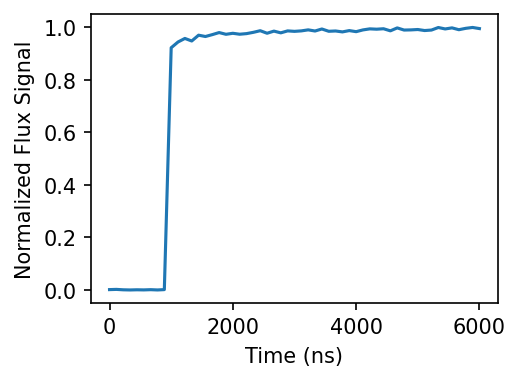

In [5]:
norm_qubit_freqs = (qubit_freqs - min(qubit_freqs)) / (max(qubit_freqs) - min(qubit_freqs))
times = all_times * 1e3 # convert to ns
times -= times[0] # shift to start at 0 ns

figure(figsize=(3.5,2.5), dpi = 150)
plot(times, norm_qubit_freqs)
xlabel('Time (ns)')
ylabel('Normalized Flux Signal')

## Find the jump location and get the response on top

Text(0.5, 1.0, 'Find the jump location')

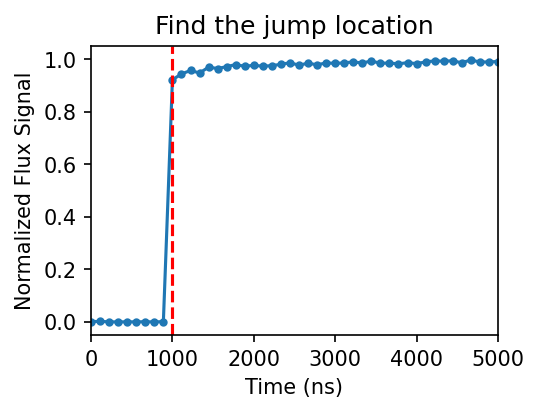

In [6]:
x_full = times
y_full = norm_qubit_freqs

jump_index =9 ### manually find the jump location

figure(figsize=(3.5,2.5), dpi = 150)
plot(x_full, y_full, '.-')
axvline(x_full[jump_index], ls = '--', color = 'r')
xlabel('Time (ns)')
ylabel('Normalized Flux Signal')
xlim(0,5000)
title('Find the jump location')

Text(0.5, 1.0, 'Cleaned disotortion data')

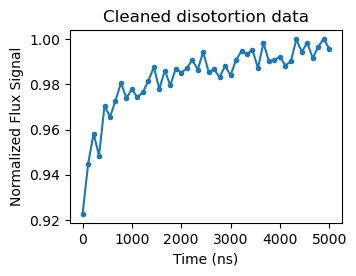

In [7]:
x_cleaned = x_full[jump_index:] - x_full[jump_index]
y_cleaned = y_full[jump_index:]

figure(figsize=(3.5,2.5), dpi = 100)
plot(x_cleaned, y_cleaned, '.-')
xlabel('Time (ns)')
ylabel('Normalized Flux Signal')
title('Cleaned disotortion data')

# Fit the resonse

In [8]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import scipy
import scipy.fftpack
import cmath
import numpy

from scipy import optimize


def fitgeneral(xdata, ydata, fitfunc, fitparams, domain=None, showfit=False, showstartfit=False, showdata=True,
               label="", mark_data='bo', mark_fit='r-'):
    """Uses optimize.leastsq to fit xdata ,ydata using fitfunc and adjusting fit params"""

    # sort data
    order = np.argsort(xdata)
    xdata = xdata[order]
    ydata = ydata[order]

    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
#    print 'minimum', np.min(fitdatay)
#    ymin=np.min(fitdatay)
    errfunc = lambda p, x, y: (fitfunc(p,x) - y) #there shouldn't be **2 # Distance to the target function
    startparams=fitparams # Initial guess for the parameters
    bestfitparams, success = optimize.leastsq(errfunc, startparams[:], args=(fitdatax,fitdatay))
    if showfit:
        if showdata:
            plt.plot(fitdatax,fitdatay,mark_data,label=label+" data")
        if showstartfit:
            plt.plot(fitdatax,fitfunc(startparams,fitdatax),label=label+" startfit")
        plt.plot(fitdatax,fitfunc(bestfitparams,fitdatax),mark_fit,label=label+" fit")
        if label!='': plt.legend()
        err=math.fsum(errfunc(bestfitparams,fitdatax,fitdatay))
#         print('the best fit has an RMS of {0}'.format(err))
#    plt.t
#    plt.figtext()    
    return bestfitparams


## Fit the response

In [9]:
_option = 0 ## 0 for single exp + linear slope; 1 for double exp + linear slope

if _option == 0:
    def disfunc(p,x):
        """p[0]+p[1]*exp(-(x-p[2])/p[3])+p[4]*x"""
        return p[0]+p[1]*math.e**(-(x-p[2])/p[3])+p[4]*x

    def fitdistor(xdata,ydata,fitparams=None,domain=None,showfit=False,showstartfit=False,label=""):
        """p[0]+p[1]*exp(-(x-p[2])/p[3])+p[4]*x"""
        if domain is not None:
            fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
        else:
            fitdatax=xdata
            fitdatay=ydata
        if fitparams is None:    
            fitparams=[0.,0.,0.,0.,0.]
            fitparams[4] = (mean(fitdatay[-50:-40])- mean(fitdatay[-11:-1]))/(mean(fitdatax[-50:-40])- mean(fitdatax[-11:-1]))
            fitparams[2]=fitdatax[0]
            fitparams[0]=mean(fitdatay[-11:-1]) - fitparams[4]*(fitdatax[-1]-mean(fitdatax[-11:-1]))

            fitparams[1]=fitdatay[0]-fitdatay[-1]
            fitparams[3]=(fitdatax[-1]-fitdatax[0])/3.

        #print fitparams
        p1 = fitgeneral(fitdatax, fitdatay, disfunc, fitparams, domain=None, showfit=showfit, showstartfit=showstartfit,
                        label=label)
        return p1 
else:
    def disfunc(p,x):
        """p[0]+p[1]*exp(-(x-p[2])/p[3]) + p[4]*exp(-(x-p[2])/p[5])+p[6]*x"""
        return p[0]+p[1]*math.e**(-(x-p[2])/p[3]) + p[4]*math.e**(-(x-p[2])/p[5]) +p[6]*x

    def fitdistor(xdata,ydata,fitparams=None,domain=None,showfit=False,showstartfit=False,label=""):
        """p[0]+p[1]*exp(-(x-p[2])/p[3]) + p[4]*exp(-(x-p[2])/p[5])+p[6]*x"""
        if domain is not None:
            fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
        else:
            fitdatax=xdata
            fitdatay=ydata
        if fitparams is None:    
            fitparams=[0.,0.,0.,0.,0.,0.,0.]
            fitparams[6] = (mean(fitdatay[-50:-40])- mean(fitdatay[-11:-1]))/(mean(fitdatax[-50:-40])- mean(fitdatax[-11:-1]))
            fitparams[2]=fitdatax[0]
            fitparams[0]=mean(fitdatay[-11:-1]) - fitparams[6]*(fitdatax[-1]-mean(fitdatax[-11:-1]))

            fitparams[1]=fitdatay[0]-fitdatay[-1]/2
            fitparams[3]=(fitdatax[-1]-fitdatax[0])/3.

            fitparams[4]=fitdatay[0]-fitdatay[-1]/2
            fitparams[5]=(fitdatax[-1]-fitdatax[0])/3.

        #print fitparams
        p1 = fitgeneral(fitdatax, fitdatay, disfunc, fitparams, domain=None, showfit=showfit, showstartfit=showstartfit,
                        label=label)
        return p1 

[ 9.76762164e-01 -6.89116711e-02 -1.02223855e+02  3.36342098e+02
  4.10952205e-06]


Text(0.5, 1.0, 'Fit the response')

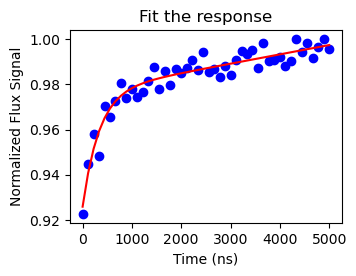

In [10]:
y_for_fit = y_cleaned
x_for_fit = x_cleaned

figure(figsize=(3.5,2.5), dpi = 100)
fit_para = fitdistor(x_for_fit,y_for_fit,showfit=True)
print(fit_para)
xlabel('Time (ns)')
ylabel('Normalized Flux Signal')
title('Fit the response')

## Resample the fit function based on hardward waveform time resolution

Text(0.5, 1.0, 'Resample response')

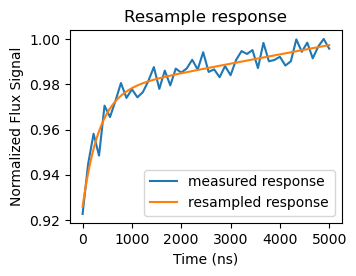

In [11]:
awg_delta_t = 1/2.4  ## ns, awg waveform time resolution, by default we use sample rate of 2.4GHz (Zurich Instruments)
x_resample = np.arange(x_for_fit[0], x_for_fit[-1],awg_delta_t)
y_resample = disfunc(fit_para, x_resample)


figure(figsize=(3.5,2.5), dpi = 100)
plot(x_cleaned, y_cleaned, label = 'measured response')
plot(x_resample, y_resample, label = 'resampled response')
legend()
xlabel('Time (ns)')
ylabel('Normalized Flux Signal')
# plt.xlim(0,500)
title('Resample response')

## Build the kernel $H(t)$ in time domain

Text(0.5, 1.0, 'H(t)')

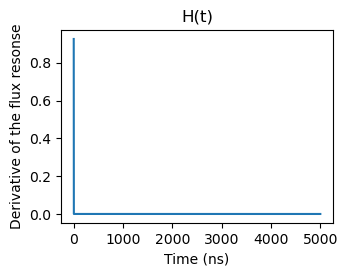

In [12]:
H_time = np.array(list([y_resample[0]]) + list(np.diff(y_resample)))

figure(figsize=(3.5,2.5), dpi = 100)
plot(x_resample, H_time)
xlabel('Time (ns)')
ylabel('Derivative of the flux resonse')
title('H(t)')

# Compensation with precalculation

## Find the kernel $H(\omega)$ frequency domain

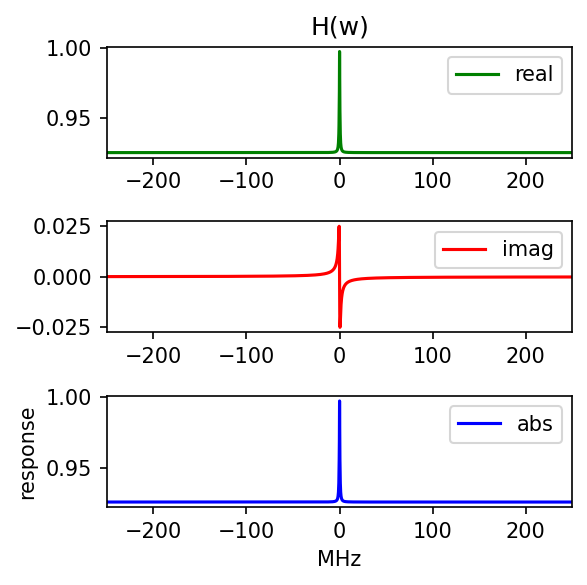

In [13]:

H_omega = np.fft.fft(H_time)
fs = np.fft.fftfreq(H_time.size, d= awg_delta_t*1e-9) ## ns -> s ; for normal frequency
sortidx = argsort(fs)

frange = [-250,250] ## plot range in Hz

figure(figsize = (4,4),dpi = 150)

subplot(311,title='H(w)')
plot(fs[sortidx]/1e6, real(H_omega[sortidx]), 'g', label='real')
xlim(frange)
legend(loc='upper right')

subplot(312)
plot(fs[sortidx]/1e6, imag(H_omega[sortidx]), 'r', label='imag')
xlim(frange)
legend(loc='upper right')

subplot(313, xlabel='MHz', ylabel='response')
plot(fs[sortidx]/1e6, abs(H_omega[sortidx]), 'b', label='abs')
xlim(frange)
legend(loc='upper right')    

tight_layout()

## Calculate the pre compensation kernel in time domain - kernel

In [14]:
H_omega_inv = 1/ H_omega
kernel = np.fft.fftshift(np.fft.ifft(H_omega_inv))

reduce_kernel_size = True
if reduce_kernel_size:
    kernel_len = 1000
    dd = 1 ## to make sure there is no shift between the target waveform and the pre-compensated waveform
    tkernel = x_resample[int(kernel.size/2-kernel_len/2):int(kernel.size/2+kernel_len/2)]-(kernel.size/2.0)*awg_delta_t
    kernel = kernel[int(kernel.size/2-kernel_len/2+dd):int(kernel.size/2+kernel_len/2+dd)]

    print('New kernel size')
    print(kernel.size)
    print(tkernel[0],tkernel[-1])
    print(kernel[0],kernel[-1])

step_t = np.arange(0,4000,awg_delta_t)
step_data = ((abs(step_t-1500))<400) #*(step_t<2)

H_time_inv = kernel


kernel = np.fft.fftshift(H_time)
reduce_kernel_size = True
if reduce_kernel_size:
    kernel_len = 1000
    dd = 1 ## to make sure there is no shift between the target waveform and the pre-compensated waveform
    tkernel = x_resample[int(kernel.size/2-kernel_len/2):int(kernel.size/2+kernel_len/2)]-(kernel.size/2.0)*awg_delta_t
    kernel = kernel[int(kernel.size/2-kernel_len/2+dd):int(kernel.size/2+kernel_len/2+dd)]

    print('New kernel size')
    print(kernel.size)
    print(tkernel[0],tkernel[-1])
    print(kernel[0],kernel[-1])

H_time_org = kernel

New kernel size
1000
-208.33333333333303 207.91666666666697
(-1.7577944237575392e-06-3.804473945793176e-19j) (-4.001187066104812e-05-4.5174280458122594e-18j)
New kernel size
1000
-208.33333333333303 207.91666666666697
1.7123417717090916e-06 3.5641145520903805e-05


(1090.0, 1110.0)

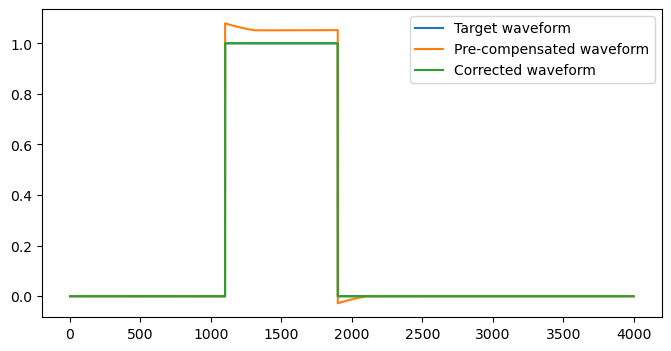

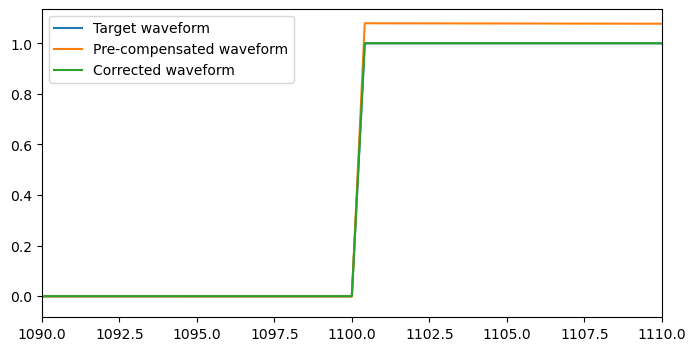

In [15]:
wf1 = np.convolve(step_data, H_time_inv, 'same')
wf2 = np.convolve(wf1, H_time_org, 'same')

figure(figsize=(8,4), dpi = 100)
plot(step_t, step_data, label = 'Target waveform')
plot(step_t, wf1, label = 'Pre-compensated waveform')
plot(step_t, wf2, label = 'Corrected waveform')
legend()

figure(figsize=(8,4), dpi = 100)
plot(step_t, step_data, label = 'Target waveform')
plot(step_t, wf1, label = 'Pre-compensated waveform')
plot(step_t, wf2, label = 'Corrected waveform')
legend()
xlim(1100-10,1100+10)

## Save kernel

In [16]:
np.save('ff_waveform/dist_kernel.npy', H_time)
np.save('ff_waveform/comp_kernel.npy', H_time_inv)